In [1]:
import re 
import pandas as pd 


In [116]:
f=open('WhatsApp Chat with Mathematics Alumni Sir Syed.txt','r',encoding='utf-8')

In [118]:
data=f.read()
# print(data)

In [120]:
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s[APM\u202f]+) - (.+)'


In [122]:
matches = re.findall(pattern, data)

# Separate dates and messages
dates = [match[0] for match in matches]
messages = [match[1] for match in matches]

In [124]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})

In [126]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,"7/13/23, 3:30 PM"
1,"Sirajudheen MP created group ""Math Alumni sir...","7/10/19, 3:13 PM"
2,You joined using this group's invite link,"7/13/23, 3:30 PM"
3,+91 97443 40504 joined using this group's invi...,"7/13/23, 3:32 PM"
4,+91 96564 70187 joined using this group's invi...,"7/13/23, 3:33 PM"


In [128]:
df['message_date']= df['message_date'].str.replace(r'\s?(AM|PM)', '', regex=True)

In [130]:
df.tail()

,user_message,message_date
769,+91 99690 25421: 👍👌💐,"1/14/25, 7:41"
770,Siddiq Sir: https://fb.watch/x67AUtSjqR/ തളിപ...,"1/14/25, 7:48"
771,Siddiq Sir: <Media omitted>,"1/14/25, 7:48"
772,+91 70263 82870: <Media omitted>,"1/17/25, 8:57"
773,+91 94470 71689: https://www.facebook.com/shar...,"1/21/25, 6:24"


In [132]:
date_format = "%m/%d/%y, %H:%M"  


df['message_date'] = pd.to_datetime(df['message_date'], format=date_format)


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  774 non-null    object        
 1   message_date  774 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 12.2+ KB


In [136]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2023-07-13 03:30:00
1,"Sirajudheen MP created group ""Math Alumni sir...",2019-07-10 03:13:00
2,You joined using this group's invite link,2023-07-13 03:30:00
3,+91 97443 40504 joined using this group's invi...,2023-07-13 03:32:00
4,+91 96564 70187 joined using this group's invi...,2023-07-13 03:33:00


In [138]:
df=df.rename({'message_date':'date'},axis=1)

In [140]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-07-13 03:30:00
1,"Sirajudheen MP created group ""Math Alumni sir...",2019-07-10 03:13:00
2,You joined using this group's invite link,2023-07-13 03:30:00
3,+91 97443 40504 joined using this group's invi...,2023-07-13 03:32:00
4,+91 96564 70187 joined using this group's invi...,2023-07-13 03:33:00


In [142]:
users=[]
messagess=[] 
for message in df['user_message']: 
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]: 
        users.append(entry[1])
        messagess.append(entry[2])
    else:
        users.append('group_notification')
        messagess.append(entry[0])

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\arshi\AppData\Local\Temp\ipykernel_1348\3861565711.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\W]+?):\s',message)


In [144]:
messagess

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 'Sirajudheen MP created group "Math  Alumni sir syed"',
 "You joined using this group's invite link",
 "+91 97443 40504 joined using this group's invite link",
 "+91 96564 70187 joined using this group's invite link",
 "Amjada Jnr joined using this group's invite link",
 "Jomin joined using this group's invite link",
 "Salman 1st Yr Sirsyed joined using this group's invite link",
 "+91 90740 04967 joined using this group's invite link",
 "+91 94952 83453 joined using this group's invite link",
 "+91 81369 55737 joined using this group's invite link",
 "+91 95391 80437 joined using this group's invite link",
 "+91 98464 74522 joined using this group's invite link",
 "+91 94975 04060 joined using this group's invite link",
 "Archana Ssc joined using this group's invite link",
 "+91 92072 09590 joined using this group's invite link",
 "+91 94475 

In [146]:
df['user']=users
df['message']=messagess
df.head()

,user_message,date,user,message
0,Messages and calls are end-to-end encrypted. N...,2023-07-13 03:30:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,"Sirajudheen MP created group ""Math Alumni sir...",2019-07-10 03:13:00,group_notification,"Sirajudheen MP created group ""Math Alumni sir..."
2,You joined using this group's invite link,2023-07-13 03:30:00,group_notification,You joined using this group's invite link
3,+91 97443 40504 joined using this group's invi...,2023-07-13 03:32:00,group_notification,+91 97443 40504 joined using this group's invi...
4,+91 96564 70187 joined using this group's invi...,2023-07-13 03:33:00,group_notification,+91 96564 70187 joined using this group's invi...


In [148]:
df=df.drop(columns=['user_message'])
df.columns

Index(['date', 'user', 'message'], dtype='object')

In [150]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [152]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-07-13 03:30:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,13,3,30
1,2019-07-10 03:13:00,group_notification,"Sirajudheen MP created group ""Math Alumni sir...",2019,July,10,3,13
2,2023-07-13 03:30:00,group_notification,You joined using this group's invite link,2023,July,13,3,30
3,2023-07-13 03:32:00,group_notification,+91 97443 40504 joined using this group's invi...,2023,July,13,3,32
4,2023-07-13 03:33:00,group_notification,+91 96564 70187 joined using this group's invi...,2023,July,13,3,33


In [156]:
# df['user'].value_counts()abs

In [158]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: xlabel='year'>

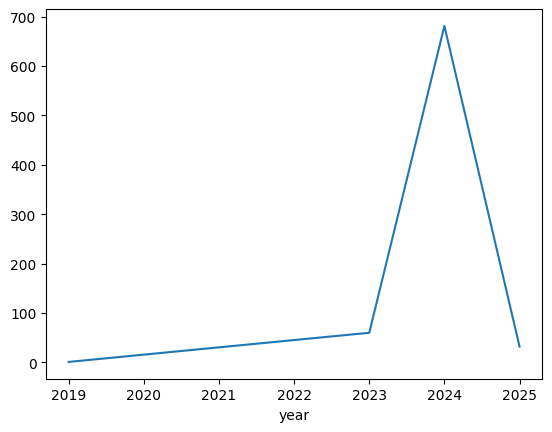

In [164]:
df.groupby('year')['message'].count().plot()

<Axes: ylabel='year'>

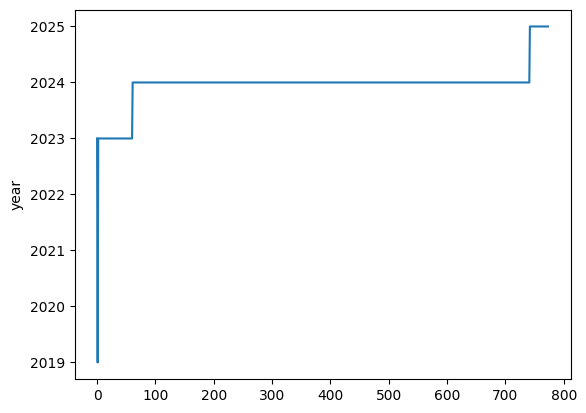

In [160]:
sns.lineplot(df['year'])

In [168]:
df['user'].unique().tolist()

['group_notification',
 'Siddiq Sir',
 'Sirajudheen MP',
 '+91 96451 06393',
 'Rishin 1st Yr',
 '+91 70254 24598',
 '+91 98471 83854',
 '+91 90487 72338',
 '+91 81369 55737',
 '+91 94973 85350',
 '+91 94978 28409',
 '+91 94958 21256',
 'Arwa Ssc',
 '+91 92076 70242',
 '+91 73566 57769',
 '+91 99470 56196',
 '+91 85476 18975',
 '+91 96339 30397',
 '+91 81568 58120',
 '+91 95265 05767',
 '+91 89434 88164',
 '+91 79078 87894',
 '+91 98464 74522',
 '+91 97469 48878',
 'Amjada Jnr',
 'Thamanna Ssc',
 '+91 95264 83987',
 'Rabee Ssc Snr',
 '+91 81579 66280',
 '+91 80787 13019',
 '+91 96565 88735',
 '+91 94465 48436',
 '+91 88487 70684',
 'Arshid',
 '+91 97444 43837',
 '+91 79023 63100',
 '+91 96450 29154',
 '+91 90748 74687',
 '+91 80891 12829',
 '+91 88485 19456',
 '+91 75102 87751',
 'Jumana Jnr',
 '+91 70259 82141',
 'Amrutha',
 '+91 94971 72237',
 'Hisana Ssc',
 '+91 79070 12976',
 '+91 81298 41429',
 '+91 99617 75914',
 '+91 92073 43916',
 '+91 96050 47777',
 '+91 75102 02742',
 '+91 628

In [170]:
df['message']

0      Messages and calls are end-to-end encrypted. N...
1      Sirajudheen MP created group "Math  Alumni sir...
2              You joined using this group's invite link
3      +91 97443 40504 joined using this group's invi...
4      +91 96564 70187 joined using this group's invi...
                             ...                        
769                                                  👍👌💐
770    https://fb.watch/x67AUtSjqR/  തളിപ്പറമ്പ് സർസയ...
771                                      <Media omitted>
772                                      <Media omitted>
773    https://www.facebook.com/share/r/1C2ejqj5dy/?m...
Name: message, Length: 774, dtype: object

In [178]:
df[df['message']=='<Media omitted>']

,date,user,message,year,month,day,hour,minute
45,2023-07-29 03:46:00,Siddiq Sir,<Media omitted>,2023,July,29,3,46
46,2023-07-29 03:48:00,Siddiq Sir,<Media omitted>,2023,July,29,3,48
49,2023-07-30 09:17:00,Sirajudheen MP,<Media omitted>,2023,July,30,9,17
61,2024-02-20 10:51:00,+91 96451 06393,<Media omitted>,2024,February,20,10,51
92,2024-03-14 08:28:00,Siddiq Sir,<Media omitted>,2024,March,14,8,28
...,...,...,...,...,...,...,...,...
765,2025-01-14 05:50:00,Siddiq Sir,<Media omitted>,2025,January,14,5,50
766,2025-01-14 07:39:00,Siddiq Sir,<Media omitted>,2025,January,14,7,39
767,2025-01-14 07:39:00,Siddiq Sir,<Media omitted>,2025,January,14,7,39
771,2025-01-14 07:48:00,Siddiq Sir,<Media omitted>,2025,January,14,7,48


In [180]:
pip install urlextract

In [182]:
from urlextract import URLExtract

In [192]:
urls=[]
for message in df['message']: 
    ur=URLExtract()
    urs=ur.find_urls(message)
    if urs: 
        urls.extend(urs)

In [194]:
urls

['https://www.instagram.com/reel/C4c_3AcOeYC/?igsh=dGpuNGxoMW1pdmNl',
 'https://www.instagram.com/reel/C3znRH2SnBF/?igsh=MTR6bWh0ZGg1aXRxNA==',
 'https://www.instagram.com/reel/C3j9PzFNC20/?igsh=MTJzNDY2ajB1dGx0bQ==',
 'https://www.instagram.com/reel/C4C8Z5lsibo/?igsh=MWV3YzFndmJ4d3VzZQ==',
 'https://www.instagram.com/reel/C6WBRD1v1X8/?igsh=MTJjbjdyczk1eHBncA==',
 'https://www.instagram.com/reel/C6TuRUTt7Mk/?igsh=NWQyZDlkZTljdnE=',
 'https://sirsyedcollege.ac.in/updates',
 'https://www.instagram.com/reel/C8w9QTUxqdK/?igsh=cXJkcWxwbzZ5czNm',
 'https://forms.gle/vo2Tm2BQFMHJ8Gqx5',
 'https://www.instagram.com/reel/C-IqLv3B0QB/?igsh=MTA2aXk2c2Z1Y3A4cg==',
 'https://www.instagram.com/reel/C4_WiqDNdGA/?igsh=MWc1OWVsMHhmMXd0dA==',
 'https://www.instagram.com/reel/DBoKfQngQOO/?igsh=YWJmOGFzMDRibmhv',
 'https://www.instagram.com/reel/DBnGOKYtdBf/?igsh=dDJybDgwaThnM3J5',
 'https://dhanamonline.com/news-views/foreign-education-agencies-revenue-decline-lmg-1352167',
 'https://chat.whatsapp.com/Eh

In [188]:

ur='Here’s a text containing simplified URLs like example.com:Looking for resources? Here’s a quick list of websites to check out:Learn coding basics: learncode.comExplore free online courses: coursesonline.com'
URLExtract().find_urls(ur)

['coursesonline.com']

In [266]:
df=df[df['user']!='group_notification']
df=df[df['message']!='<Media omitted>']

In [268]:
X=df['user'].value_counts().head()

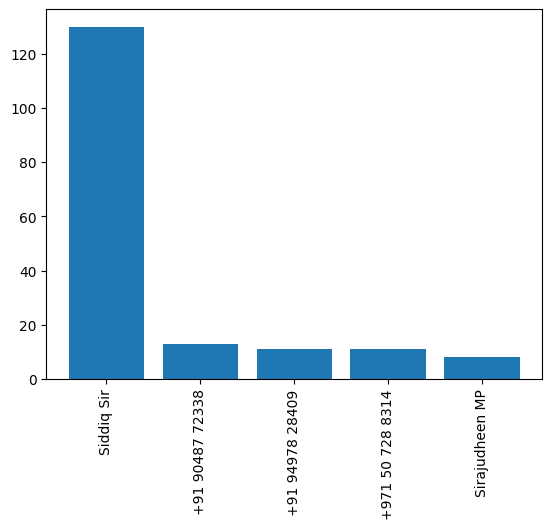

In [270]:
plt.bar(X.index,X.values)
plt.xticks(rotation='vertical')
plt.show()

In [242]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'user':'user','count':'percentage'})

,user,percentage
0,Siddiq Sir,37.55
1,Sirajudheen MP,4.60
2,+91 98471 83854,3.83
3,+91 90487 72338,2.87
4,+91 96451 06393,2.49
...,...,...
162,+91 95676 01349,0.19
163,+91 97468 89935,0.19
164,+91 99610 05567,0.19
165,+91 99629 35473,0.19


In [276]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()

In [278]:
words=[]
for message in df['message']: 
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    # words.extend(message.split())
    

In [280]:
words

['message',
 'deleted',
 '1980',
 'കളിൽ',
 'ഉള്ളവർ',
 'വരെയുണ്ട്',
 'സർ',
 'സയ്യിദ്',
 'കോളേജ്',
 'മാത്തമാറ്റിക്സ്',
 'ഡിപ്പാർട്ട്\u200cമെന്റ്',
 'അലുംനിയുടെ',
 'ഒരു',
 'ഡാറ്റ',
 'കളക്ഷൻ',
 'ഫോം',
 'ആണ്',
 'ഇത്.',
 'എല്ലാവരും',
 'ഫിൽ',
 'ചെയ്ത്',
 'സഹകരിക്കുമല്ലോ😊',
 'https://www.instagram.com/reel/c4c_3acoeyc/?igsh=dgpungxomw1pdmnl',
 'https://www.instagram.com/reel/c3znrh2snbf/?igsh=mtr6bwh0zgg1axrxna==',
 'എന്തെങ്കിലും',
 'നല്ല',
 'പോസ്റ്റുകൾ',
 'ഇടക്ക്',
 'പോസ്റ്റി',
 'ഗ്രൂപ്പ്\u200c',
 'സജീവമാക്കണേ',
 'ഗ്രൂപ്പ്\u200c',
 'ഫോട്ടോസ്',
 'ഒക്കെ',
 'message',
 'deleted',
 'message',
 'deleted',
 'https://www.instagram.com/reel/c3j9pzfnc20/?igsh=mtjzndy2ajb1dgx0bq==',
 'ഗ്രൂപ്പിലുള്ള',
 'എല്ലാവർക്കും',
 'നല്ലൊരു',
 'വിഷു',
 'ദിനം',
 'ആശംസിക്കുന്നു.',
 'happy',
 'vishu🤍💯',
 'ഇന്നലെകളിലെ',
 'വിഷു',
 'stati',
 'അലുംനി',
 '😍',
 '👍👍🔥',
 '👍',
 '👍🏻',
 'പേരാവൂർ',
 'ന്',
 'അടുത്ത്',
 'വീടുള്ള',
 'ആരെങ്കിലും',
 'ഉണ്ടോ??',
 'ആരെയെങ്കിലും',
 'അറിയുമോ',
 'പ്ലീസ്',
 'മെസ്സേജ്',
 'മി',
 'പേർസണൽ',
 'htt

In [282]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,27
1,deleted,24
2,👍,8
3,fathima,8
4,കോളേജ്,6
5,പ്ലീസ്,6
6,👆👆,6
7,ഒന്ന്,6
8,yum,6
9,ഒരു,5


In [290]:
import emoji


In [302]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [308]:
emoji_df[0].head()

0    👍
1    👆
2    👏
3    😍
4    💪
Name: 0, dtype: object

In [310]:
df['month_num']=df['date'].dt.month

In [318]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [320]:
timeline

,year,month_num,month,message
0,2023,7,July,2
1,2023,8,August,1
2,2024,3,March,1
3,2024,4,April,18
4,2024,5,May,5
5,2024,6,June,22
6,2024,7,July,53
7,2024,8,August,45
8,2024,9,September,4
9,2024,10,October,6


In [328]:
time=[]
for i in range(timeline.shape[0]): 
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [332]:
timeline['time']=time

In [334]:
timeline.head()

,year,month_num,month,message,time
0,2023,7,July,2,July-2023
1,2023,8,August,1,August-2023
2,2024,3,March,1,March-2024
3,2024,4,April,18,April-2024
4,2024,5,May,5,May-2024


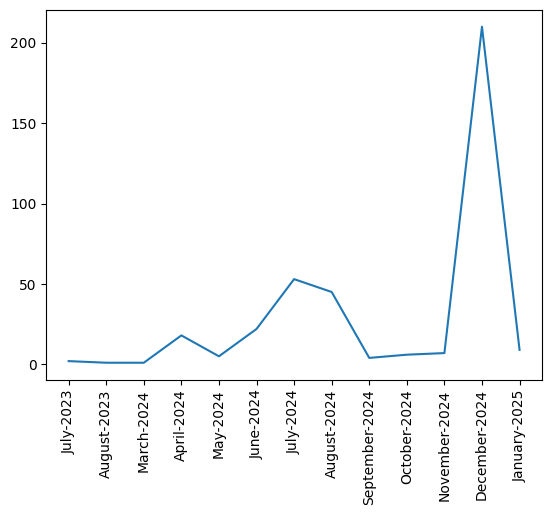

In [340]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [342]:
df['date_only']=df['date'].dt.date

In [344]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,date_only
47,2023-07-29 08:51:00,Sirajudheen MP,This message was deleted,2023,July,29,8,51,7,2023-07-29
48,2023-07-29 08:53:00,Sirajudheen MP,1980 കളിൽ ഉള്ളവർ വരെയുണ്ട്,2023,July,29,8,53,7,2023-07-29
53,2023-08-06 09:11:00,+91 96451 06393,സർ സയ്യിദ് കോളേജ് മാത്തമാറ്റിക്സ് ഡിപ്പാർട്ട്‌...,2023,August,6,9,11,8,2023-08-06
94,2024-03-14 08:30:00,Siddiq Sir,https://www.instagram.com/reel/C4c_3AcOeYC/?ig...,2024,March,14,8,30,3,2024-03-14
110,2024-04-08 08:18:00,Siddiq Sir,https://www.instagram.com/reel/C3znRH2SnBF/?ig...,2024,April,8,8,18,4,2024-04-08


In [348]:
daily_timeline=df.groupby('date_only')['message'].count().reset_index()

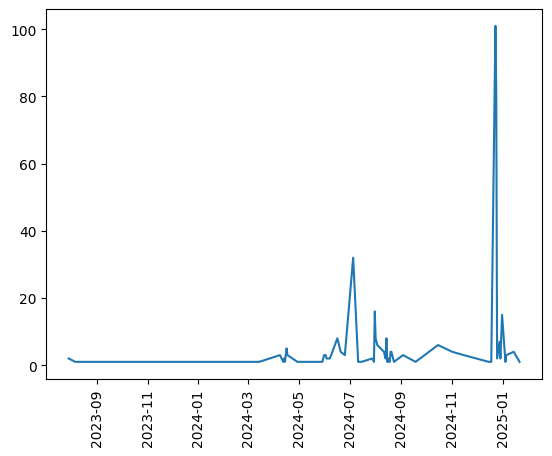

In [356]:
plt.plot(daily_timeline['date_only'],daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [360]:
df['day_name']=df['date'].dt.day_name()

In [362]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,date_only,day_name
47,2023-07-29 08:51:00,Sirajudheen MP,This message was deleted,2023,July,29,8,51,7,2023-07-29,Saturday
48,2023-07-29 08:53:00,Sirajudheen MP,1980 കളിൽ ഉള്ളവർ വരെയുണ്ട്,2023,July,29,8,53,7,2023-07-29,Saturday
53,2023-08-06 09:11:00,+91 96451 06393,സർ സയ്യിദ് കോളേജ് മാത്തമാറ്റിക്സ് ഡിപ്പാർട്ട്‌...,2023,August,6,9,11,8,2023-08-06,Sunday
94,2024-03-14 08:30:00,Siddiq Sir,https://www.instagram.com/reel/C4c_3AcOeYC/?ig...,2024,March,14,8,30,3,2024-03-14,Thursday
110,2024-04-08 08:18:00,Siddiq Sir,https://www.instagram.com/reel/C3znRH2SnBF/?ig...,2024,April,8,8,18,4,2024-04-08,Monday


In [372]:
df['day_name'].value_counts()

day_name
Tuesday      125
Monday       115
Friday        48
Wednesday     35
Sunday        26
Saturday      19
Thursday      15
Name: count, dtype: int64

In [370]:
df.groupby(['user','day_name'])['message'].count().sort_values(ascending=False).reset_index()

,user,day_name,message
0,Siddiq Sir,Tuesday,34
1,Siddiq Sir,Friday,29
2,Siddiq Sir,Monday,25
3,Siddiq Sir,Wednesday,19
4,+971 50 728 8314,Tuesday,11
...,...,...,...
204,Rishin 1st Yr,Tuesday,1
205,Rizna,Tuesday,1
206,Sirajudheen MP,Wednesday,1
207,Thamanna Ssc,Thursday,1
